## how does numbers get tokenzied and embedded and used in LLMs???

In [1]:
# When you feed a number (eg: 1234 or 3.1415) to a tokenizer such as GPT’s or BERT’s,
# the model does not see it as a numeric value — it only sees text (characters).

# So tokenization treats numbers as sequences of characters, not as actual numeric quantities.

In [2]:
# not all possible numbers are in the vocabulary.
# That would be impossible (there are infinitely many).
# only frequent ones are single tokens


# After tokenization, each token (whether a word or part of a number) is mapped to a vector via the embedding matrix.
# It doesn’t “know” that 3.1415 is bigger than 2.5 — it only learns patterns in how numbers are used in language.

In [ ]:
# So the model can still read it, but it doesn’t really “understand” the numeric scale — just the textual pattern.


# Because of this text-based tokenization:

# LLMs struggle with precise arithmetic (like exact addition or comparison).

# They handle small integers well (since they saw “2 + 2 = 4” in training).

# They generalize approximate numeric patterns (like “a million is large”) but not actual math.

# That’s why external tools (like Python or Wolfram plugins) are used when precise numeric reasoning is needed.

In [8]:
from transformers import GPT2Tokenizer
import numpy as np
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')


In [9]:
eq = '5 x 3 ='
tokens = tokenizer.encode(eq)

#try the math
print(f'{eq} -> {tokens}')
print(f'Product of tokens = {np.prod(tokens)}')
print(f' which is "{tokenizer.decode(np.prod(tokens))}"')


5 x 3 = -> [20, 2124, 513, 796]
Product of tokens = 17346623040


TypeError: 'NoneType' object is not iterable

In [19]:
# maybe just with numbers?

t5 = tokenizer.encode('5')
t3 = tokenizer.encode('3')

print(f'"5" and "3" have tokens {t5} and {t3}.')
print(f'Their product is {t5[0]*t3[0]}, which is "{tokenizer.decode(t5[0]*t3[0])}"')

"5" and "3" have tokens [20] and [18].
Their product is 360, which is " D"


# can we do arithmetic using embeddings as they have semantical meanings???

In [ ]:
from transformers import GPT2Model, GPT2Tokenizer
gpt2 = GPT2Model.from_pretrained('gpt2')
embeddings = gpt2.wte.weight.detach().numpy()

In [28]:
#isolate embedding vectors
e5 = embeddings[t5,:].squeeze()
e3 = embeddings[t3,:].squeeze()

#math 
theirSum = e3+e5
theirProd = e3*e5  # this is elemebt vice mult


In [36]:
theirSum.shape

(768,)

In [38]:
#unembedding as transpose of embeddings
sumUnembed = theirSum @ embeddings.T  # @ is matrix mult in Python
prodUnembed = theirProd @ embeddings.T

#rpint sizes
print(f'Summed Vector X embeddings matrix = unembeddings vector')
print(f'     {theirSum.shape}   X   {embeddings.shape}   = {sumUnembed.shape}')


#find the argmax of output to find the final unembedded texts
print(f'Max embedding of 5+3 = "{tokenizer.decode(np.argmax(sumUnembed))}"')
print(f'Max embedding of 5x3 = "{tokenizer.decode(np.argmax(prodUnembed))}"')

Summed Vector X embeddings matrix = unembeddings vector
     (768,)   X   (50257, 768)   = (50257,)
Max embedding of 5+3 = "5"
Max embedding of 5x3 = " Weinstein"


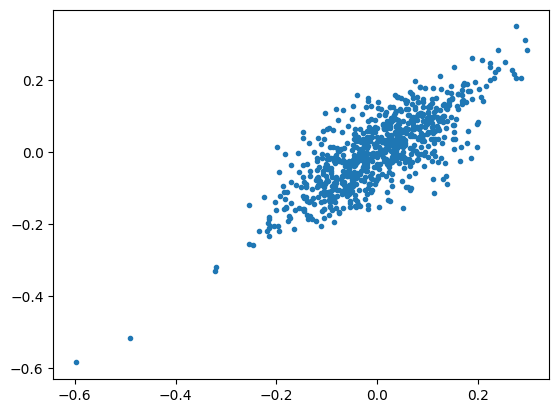

In [42]:
import matplotlib.pyplot as plt
plt.plot(e5,e3,'.')
plt.show()

In [43]:
# Max embedding of 5+3 = "5"


# THis happened bcoz embedding vector of 5 and embedding vector 3 has strong cosine similarity, so that when we add them together
# # we dont really do a whole lot
# that is 3 doesn't really change direction of vector of five

